# Sentiment Analysis on Youtube Comment Data

### Task1 : Perform Sentiment analysis on YouTube comments (Polarity)
### Task2 : Perform EDA for the Positive Sentences (Word Cloud)
### Task3 : Perform EDA for the Negative Sentences (Word Cloud)
### Task4 : Create a generic function for sentiment analysis

## Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import

In [2]:
comments = pd.read_csv('E:\Data Science Learning\Data Analytics\Youtube/GBcomments.csv',error_bad_lines = False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


## Task1 : Perform Sentiment analysis on YouTube comments (Polarity)
Importing **textblob** library to generate polarity

In [4]:
from textblob import TextBlob

### Searching and droping na values

In [5]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [6]:
comments.dropna(inplace = True)

### Polarity : Score generated in rage of -1 to 1 to represent sentiment of text. 1 for positive and -1 for negative

In [7]:
polarity = []
for i in comments['comment_text']:
     polarity.append(TextBlob(i).sentiment.polarity)

In [8]:
comments['polarity'] = polarity

In [9]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


## Task2 : Perform EDA for the Positive Sentences (Word Cloud)

In [10]:
comments_positive = comments[comments['polarity'] == 1]

comments_positive.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


### word cloud of most used word in positive sentiment 

In [11]:
from wordcloud import WordCloud,STOPWORDS

### stopwords : most frequently used word which have no relevance with sentiments like "he, she, her, that, a, with , this and etc."

In [12]:
stopwords = set(STOPWORDS)

In [16]:
total_comments = ''.join(comments_positive['comment_text'])
total_comments

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.The best thing to ever happen to iPhoneApple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4das a lot of edditing you have done there ... I like it :DWelcome to the Scandiworld!Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!the sonic air timer was perfectno 16 on trending impressiveMy daughters name is lacey <3I'm 17 and can proudly say Moon Dreamers was one of my favourite shows!if I could subscribe to Dude Perfect a million times I wouldYou guys should make dude perfect sceetsTo be a dude perfect member it is so awesome ....Dude Perfect sh

In [20]:
wordcloud = WordCloud(width=1500,height=800,stopwords=stopwords).generate(total_comments)

(-0.5, 1499.5, 799.5, -0.5)

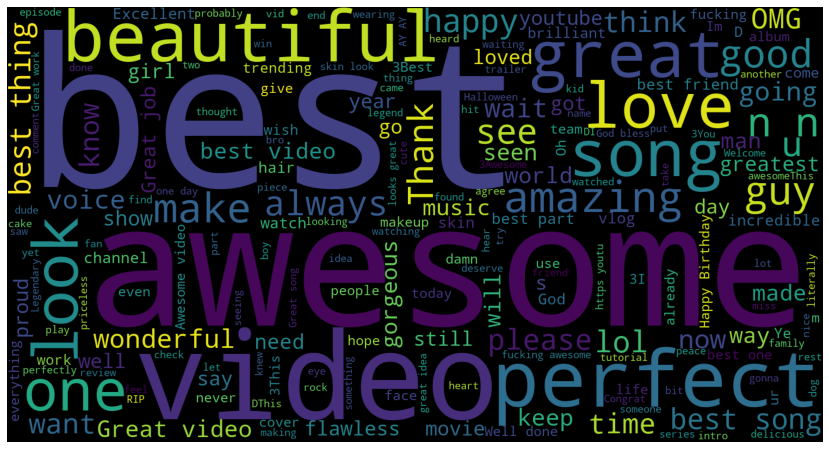

In [28]:
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')

## Task3 : Perform EDA for the Negative Sentences (Word Cloud)


In [23]:
comments_negative = comments[comments['polarity']==-1]

In [24]:
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
1387,ql0Op1VcELw,boring,0,0,-1.0
1394,ql0Op1VcELw,0:22 **laughs at terrible pun**,1,1,-1.0
1530,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
1745,F2uJvwiSZAQ,People making jokes about 9/11 is truly disgus...,1,0,-1.0
1793,F2uJvwiSZAQ,Thats insane.,0,0,-1.0


In [25]:
total_neg_comments = ' '.join(comments_negative['comment_text'])

In [26]:
wordcloud_negative = WordCloud(width = 1500, height = 800, stopwords = stopwords).generate(total_neg_comments)

(-0.5, 1499.5, 799.5, -0.5)

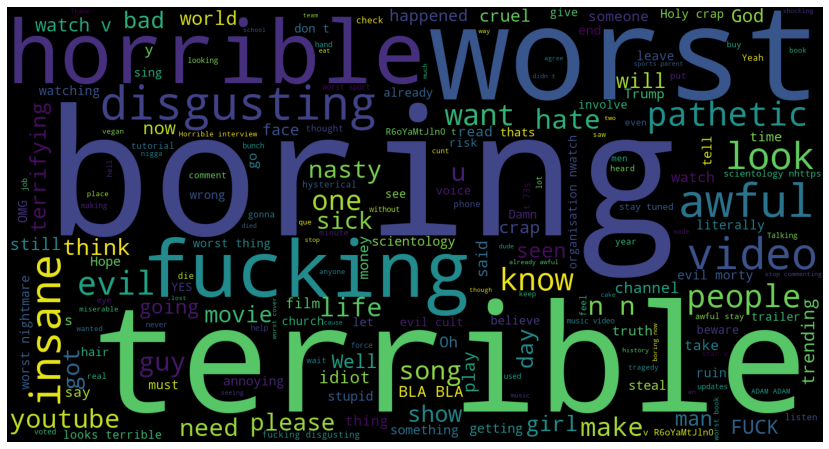

In [27]:
plt.figure(figsize=(20,8))
plt.imshow(wordcloud_negative)
plt.axis('off')

## Task4 : Create a generic function for sentiment analysis

In [30]:
def sentimentCloud(sentiment):
    #sentiment 1 for positive and -1 for negative
    comments_sentiment = comments[comments['polarity'] == sentiment]
    
    total_comments = ' '.join(comments_sentiment['comment_text'])
    
    wordcloud = WordCloud(width =1500, height = 500, stopwords = stopwords).generate(total_comments)
    plt.figure(figsize=(15,6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

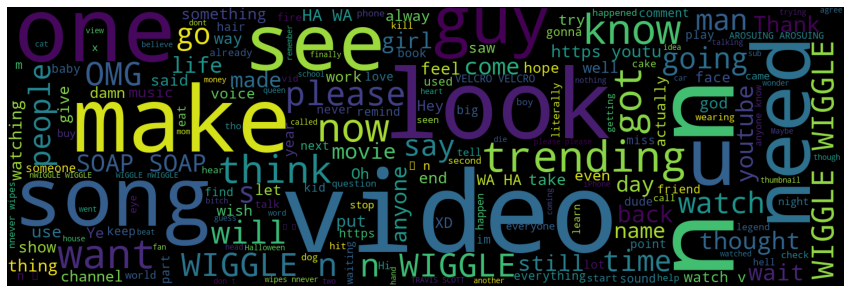

In [31]:
sentimentCloud(0)